# Test TFmini-S time-of-flight distance sensor

In [1]:
import serial
import time
import matplotlib.pyplot as plt

### use USB serial stick
There are four wires:
- red power
- black ground
- white RX into USB port
- and green TX out of the USB port.

The power pin provides the 5V @ 500mA direct from the USB port and the RX/TX pins are 3.3V level for interfacing with the most common 3.3V logic level chipsets.

Connect to same color on TFmini, cross green/white.

In [2]:
!ls -l /dev/ttyUSB*

crw-rw---- 1 root dialout 188, 0 Nov  5 11:16 /dev/ttyUSB0


In [5]:
help(serial.Serial)

Help on class Serial in module serial.serialposix:

class Serial(serial.serialutil.SerialBase, PlatformSpecific)
 |  Serial(port=None, baudrate=9600, bytesize=8, parity='N', stopbits=1, timeout=None, xonxoff=False, rtscts=False, write_timeout=None, dsrdtr=False, inter_byte_timeout=None, exclusive=None, **kwargs)
 |  
 |  Serial port class POSIX implementation. Serial port configuration is
 |  done with termios and fcntl. Runs on Linux and many other Un*x like
 |  systems.
 |  
 |  Method resolution order:
 |      Serial
 |      serial.serialutil.SerialBase
 |      io.RawIOBase
 |      _io._RawIOBase
 |      io.IOBase
 |      _io._IOBase
 |      PlatformSpecific
 |      PlatformSpecificBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  cancel_read(self)
 |  
 |  cancel_write(self)
 |  
 |  close(self)
 |      Close port
 |  
 |  fileno(self)
 |      For easier use of the serial port instance with select.
 |      WARNING: this function is not portable to different platf

### read the firmware version

In [47]:
ser = serial.Serial('/dev/ttyUSB0', baudrate=115200, timeout=0.5)  # open serial port
print(ser.name)         # check which port was really used
print(ser.timeout)
ser.flushInput()
ser.write(b'\x5a\x04\x01\x5f')     # command
# read the response
# expect: 5A 07 01 V1 V2 V3 #checksum
response = ser.read(size=100)
print(response.hex(' '))
ser.close()             # close port

/dev/ttyUSB0
0.5
59 59 00 00 e3 03 70 09 11 5a 07 01 02 04 02 6a 59 59 00 00 e6 03 70 09 14 59 59 00 00 e1 03 70 09 0f 59 59 00 00 e2 03 70 09 10 59 59 00 00 de 03 70 09 0c 59 59 00 00 d8 03 70 09 06 59 59 00 00 dc 03 70 09 0a 59 59 00 00 d9 03 70 09 07 59 59 00 00 d1 03 70 09 ff 59 59 00 00 d6 03 70 09 04 59 59 00


In [48]:
ser = serial.Serial('/dev/ttyUSB0', baudrate=115200, timeout=0.5)  # open serial port
print(ser.name)         # check which port was really used
print(ser.timeout)
ser.flush()
ser.write(b'\x5a\x05\x07\x00\x66')     # disable data
time.sleep(0.1)
ser.flushInput()
ser.write(b'\x5a\x04\x01\x5f')     # command
# read the response
# expect: 5A 07 01 V1 V2 V3 #checksum
response = ser.read(size=100)
print(response.hex(' '))
ser.close()             # close port

/dev/ttyUSB0
0.5
5a 07 01 02 04 02 6a


In [49]:
ser = serial.Serial('/dev/ttyUSB0', baudrate=115200, timeout=0.5)  # open serial port
print(ser.name)         # check which port was really used
print(ser.timeout)
ser.flushInput()
ser.write(b'\x5a\x05\x07\x01\x67')     # enable data
time.sleep(0.1)
ser.flushInput()
ser.write(b'\x5a\x04\x01\x5f')     # command
# read the response
# expect: 5A 07 01 V1 V2 V3 #checksum
response = ser.read(size=100)
print(response.hex(' '))
ser.close()             # close port

/dev/ttyUSB0
0.5
5a 07 01 02 04 02 6a 59 59 00 00 0f 04 70 09 3e 59 59 00 00 16 04 70 09 45 59 59 00 00 18 04 70 09 47 59 59 00 00 20 04 70 09 4f 59 59 00 00 2a 04 70 09 59 59 59 00 00 2d 04 70 09 5c 59 59 00 00 35 04 70 09 64 59 59 00 00 40 04 70 09 6f 59 59 00 00 3f 04 70 09 6e 59 59 00 00 3c 04 70 09 6b 59 59 00


In [ ]:
Byte0 -1
 Byte2
 Byte3
 Byte4
 Byte5
 Byte6
 Byte7
 Byte8
0x59 59
 Dist_L
 Dist_H
 Strength_L
 Strength_H
 Temp_L
 Temp_H
 Checksum


In [56]:
time.time()

1699204017.7681065

In [5]:
stream = b''
distance = []
strength = []

ser = serial.Serial('/dev/ttyUSB0', baudrate=115200, timeout=0.5)  # open serial port
ser.flushInput()

start_time = time.time()
stop_time = start_time+5.0

while time.time()<stop_time:
    
    stream = stream + ser.read(size=200)
    while len(stream)>=9:
        if stream[0:2]==b'\x59\x59':
            dist_L = stream[2]
            dist_H = stream[3]
            distance.append(2.56*dist_H+0.01*dist_L)
            stream = stream[9:]
        else:
            print(stream[0:2])
            stream = stream[1:]
    
ser.close()
print('receiver stopped.')
print(len(distance))

receiver stopped.
511


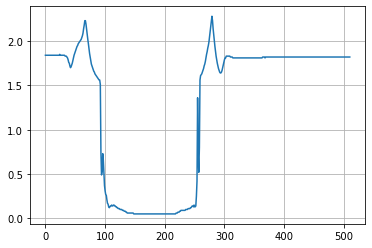

In [6]:
plt.plot(distance)
plt.grid()
plt.show()

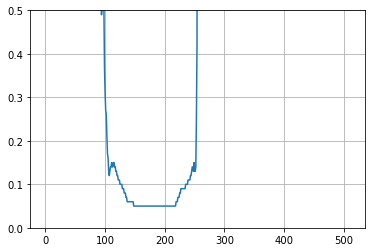

In [7]:
plt.plot(distance)
plt.grid()
plt.ylim(0,0.5)
plt.show()